導入此module, 為方便使用與閱讀將模組名稱縮寫為qc2與sv2

In [14]:
from qiskit_extension.quantum_circuit2 import QuantumCircuit2 as qc2
from qiskit_extension.state_vector2 import StateVector2 as sv2

## 量子電路 QuantumCircuit2 基本操作
QuantumCircuit2物件, 此物件用以建立量子電路、並僅用來操作StateVector2物件(模擬量子經過某電路後的state變化)

### 初始化一個2 qubit的量子電路

In [2]:
circuit_EPR = qc2(2)

### 加入不同操作元件，並將其繪製出來

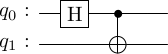

In [3]:
# 1. 在qubit 0 的位置放入一個Hadamard gate
circuit_EPR.h(0)

# 2. 放入一個CNOT gate, 控制qubit為0, 目標qubit為1
circuit_EPR.cx(0, 1)

# 3. 繪製電路圖
circuit_EPR.show_circ()

### to_matrix(): 將電路轉換成矩陣表示(此矩陣為量子電路的unitary matrix, 以np.array的形式儲存)

In [4]:
circuit_EPR.to_matrix()

array([[ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.70710678+0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j]])

### show_matrix(): 為方便檢視，將矩陣以latex的矩陣形式顯示

In [17]:
circuit_EPR.show_matrix()

<IPython.core.display.Latex object>

## StateVector2 基本操作
StateVector2物件, 此物件用以保存量子的state vector, 並提供相關操作(如測量,放入量子電路得到新的state vector 等等)

### 呼叫from_label, 以符號建立一個sv2物件, 並用show_state()顯示此state

In [5]:
# 建立一個|00>的state vector
state00 = sv2.from_label('00')

# 顯示出此sv2物件的狀態 
state00.show_state()

<IPython.core.display.Latex object>

In [20]:
# 建立state vector: 2( √2|0> + |+> - |-> )
state_x0 = sv2.from_label((2**0.5,"0"),"+",(-1,"-"))

# 顯示出此sv2物件的狀態
state_x0.show_state()

'Statevector:\n[[0.70710678+0.j],\n [0.70710678+0.j]]'

### to_matrix(): 將state vector轉為矩陣

In [7]:
state00.to_matrix()

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [8]:
state_x0.to_matrix()

array([[0.70710678+0.j],
       [0.70710678+0.j]])

### show_matrix(): 為方便檢視，將矩陣以latex的矩陣形式顯示

In [18]:
state00.show_matrix()

<IPython.core.display.Latex object>

In [19]:
state_x0.show_matrix()

<IPython.core.display.Latex object>

### evolve(): 透過量子電路來演化state vector

In [9]:
# 將|00>經過EPR電路後的狀態
state_EPR = state00.evolve(circuit_EPR)

# 顯示出此sv2物件的狀態
state_EPR.show_state()

<IPython.core.display.Latex object>

### show_measure(): 進行測量, 並顯示測量結果以及對應之測量後的state

In [10]:
# 建立一個GHZ state
state_GHZ = sv2.from_label("000","111")

# 量測GHZ state的第一個qubit, 並顯示出結果
state_GHZ.show_measure(0)

<IPython.core.display.Latex object>

### measure(): 進行測量, 並回傳測量結果以及對應之測量後的state
measure() 回傳值為一個list, 其中 \
list[0b00]=量測到|00>後的state (StateVector2物件), \
list[0b01]=量測到|01>後的state (StateVector2物件), \
...

In [11]:
# 量測EPR pair的第一,二顆qubit後，將各種量測結果對應到的state vector存入一個list中
list_after_measure_bit01 = state_GHZ.measure([0,1])

# 顯示出量測到00的後state vector
list_after_measure_bit01[0b00].show_state()

<IPython.core.display.Latex object>

In [12]:
# 此為None, 因為GHZ量測第0,1顆qubit，不可能出現00的結果
list_after_measure_bit01[0b01] is None

True